In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df = pd.read_csv(url, parse_dates=True)
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [3]:
states = df['state'].unique()

In [13]:
df_state = df[df['state']=='Washington']
df_state.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
4,2020-01-24,Washington,53,1,0
7,2020-01-25,Washington,53,1,0


In [14]:
dates = df_state['date']
new_dates = dates[1:]
cases = df_state['cases']
new_cases = np.diff(cases)
new_df = pd.DataFrame({'date': new_dates, 
              'new_cases': new_cases})
new_df.tail(7)

,date,new_cases
6995,2020-07-07,546
7050,2020-07-08,598
7105,2020-07-09,708
7160,2020-07-10,721
7215,2020-07-11,236
7270,2020-07-12,855
7325,2020-07-13,1357


In [15]:
date_seventh = df_state['date'][::14]
rolling_cases = new_df['new_cases'].rolling(7).mean()

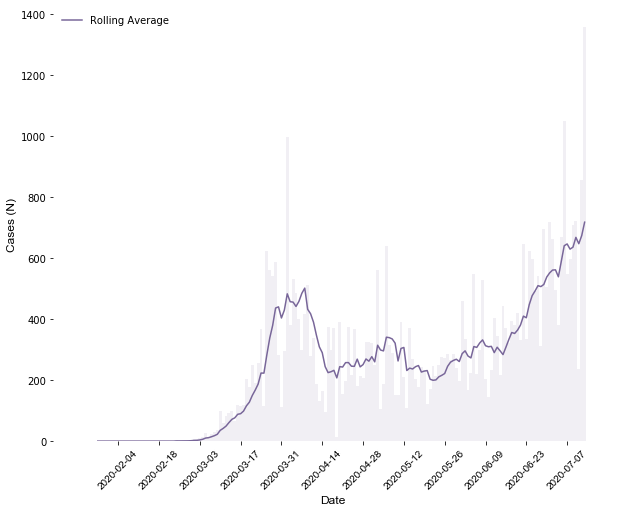

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))

right_side = ax.spines['right']
right_side.set_visible(False)
left_side = ax.spines['left']
left_side.set_visible(False)
top_side = ax.spines['top']
top_side.set_visible(False)
bottom_side = ax.spines['bottom']
bottom_side.set_visible(False)

line = plt.plot(new_df['date'], rolling_cases, color=(0.47, 0.40, 0.60))
bar = plt.bar(new_df['date'], new_df['new_cases'], color=(0.47, 0.40, 0.60), alpha=0.1, width=1)
plt.xticks(ticks=date_seventh[1:13], rotation=45, fontname='Arial', fontsize=10)
# plt.title('Seven Day Rolling Average New COVID-19 Cases')
plt.ylabel('Cases (N)', fontname='Arial', fontsize=12)
plt.xlabel('Date', fontname='Arial', fontsize=12)
plt.legend(line, ('Rolling Average',), loc='upper left', frameon=False)
#plt.savefig('washington_bar_roll_plot.png', dpi=None, facecolor='w', edgecolor='w', orientation='portrait')

plt.show()